In [5]:
## Project Outline
# Load Data
# Exploratory Analysis
# Initial Model
# Evaluation
# Feature Engineering
# Model 2
# Evaluation
# Further Investigation/Exploration

<img src='Midterm_Timeline_Rubric.jpg'>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
pwd

'/Users/samuelstollman-smouha/Desktop/flatiron/Midterm'

In [8]:
df = pd.read_csv('NYC_Cab_Duration.csv', index_col=0, parse_dates=['pickup_datetime','dropoff_datetime'])

In [9]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808
358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787
1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679
110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791


In [10]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,583458.000000,583458.000000,583458.000000,583458.000000,583458.000000,583458.000000,5.834580e+05
mean,1.535302,1.667131,-73.973520,40.750927,-73.973516,40.751822,9.622880e+02
std,0.498753,1.317806,0.098931,0.032237,0.098952,0.035565,6.151275e+03
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000e+00
25%,1.000000,1.000000,-73.991837,40.737320,-73.991318,40.735905,3.960000e+02
50%,2.000000,1.000000,-73.981712,40.754143,-73.979752,40.754528,6.610000e+02
75%,2.000000,2.000000,-73.967285,40.768394,-73.963013,40.769836,1.074000e+03
max,2.000000,9.000000,-65.848389,43.017578,-65.848389,43.674000,3.526282e+06


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583458 entries, 583100 to 183456
Data columns (total 11 columns):
id                    583458 non-null object
vendor_id             583458 non-null int64
pickup_datetime       583458 non-null datetime64[ns]
dropoff_datetime      583458 non-null datetime64[ns]
passenger_count       583458 non-null int64
pickup_longitude      583458 non-null float64
pickup_latitude       583458 non-null float64
dropoff_longitude     583458 non-null float64
dropoff_latitude      583458 non-null float64
store_and_fwd_flag    583458 non-null object
trip_duration         583458 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 53.4+ MB


In [12]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [13]:
df.groupby(['vendor_id']).nunique()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
vendor_id,,,,,,,,,,,
1,271132,1,268359,268270,7,15550,32919,20867,41812,2,4712
2,312326,1,308584,308587,9,16198,32785,21630,41490,1,5591


In [14]:
df.groupby('store_and_fwd_flag').trip_duration.mean()

store_and_fwd_flag
N     961.677655
Y    1070.508557
Name: trip_duration, dtype: float64

In [15]:
df.pickup_datetime.dtype

dtype('<M8[ns]')

In [16]:
pd.to_datetime(df.pickup_datetime).head()

583100    2016-06-02 17:46:16
1320440   2016-03-02 10:07:11
358078    2016-02-17 17:18:27
1118733   2016-03-17 07:30:59
110409    2016-04-20 17:15:26
Name: pickup_datetime, dtype: datetime64[ns]

In [17]:
df.trip_duration.head()

583100     2170
1320440     808
358078     3787
1118733     679
110409     2791
Name: trip_duration, dtype: int64

In [18]:
((df.dropoff_datetime - df.pickup_datetime)).head()

583100    00:36:10
1320440   00:13:28
358078    01:03:07
1118733   00:11:19
110409    00:46:31
dtype: timedelta64[ns]

In [19]:
#Actually apply and save changes
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
print(df.pickup_datetime.dtype)
#Preview updated dataframe
df.head()

datetime64[ns]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170
1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808
358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787
1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679
110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791


In [20]:
df['week_day'] = df.pickup_datetime.dt.day_name()

In [21]:
# df['pic']

In [22]:
grouped2 = df.groupby('week_day').passenger_count.mean().sort_values(ascending=False)
grouped2.head()

week_day
Saturday    1.733676
Sunday      1.718676
Friday      1.664768
Monday      1.639850
Tuesday     1.639380
Name: passenger_count, dtype: float64

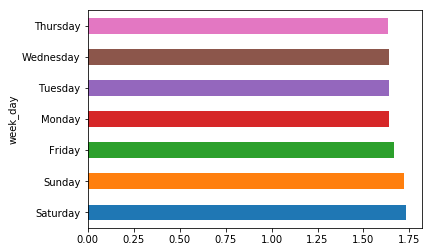

In [23]:
grouped2.head(7).plot(kind='barh')

In [24]:

daydict = {'Monday': 0, 'Tuesday': 1, 'Friday': 4, 'Wednesday': 2, 'Thursday': 3, 'Sunday': 6, 'Saturday': 5}


In [25]:
grouped2

week_day
Saturday     1.733676
Sunday       1.718676
Friday       1.664768
Monday       1.639850
Tuesday      1.639380
Wednesday    1.636925
Thursday     1.634559
Name: passenger_count, dtype: float64

In [26]:
grouped2 = df.groupby('week_day').passenger_count.sum().sort_values(ascending=False)
grouped2 = grouped2.to_frame().reset_index()
grouped2['week_day2'] = grouped2.week_day.map(daydict)
grouped2 = grouped2.sort_values(by=['week_day2'])
grouped2 = grouped2.drop(columns=['week_day2'])
grouped2 = grouped2.set_index ('week_day')
# df.drop(columns=['B', 'C'])
#df.sort_values(by=['col1'])
#df.set_index('month')

In [27]:
grouped2

,passenger_count
week_day,
Monday,122687
Tuesday,133275
Wednesday,137027
Thursday,143274
Friday,149378
Saturday,152938
Sunday,134122


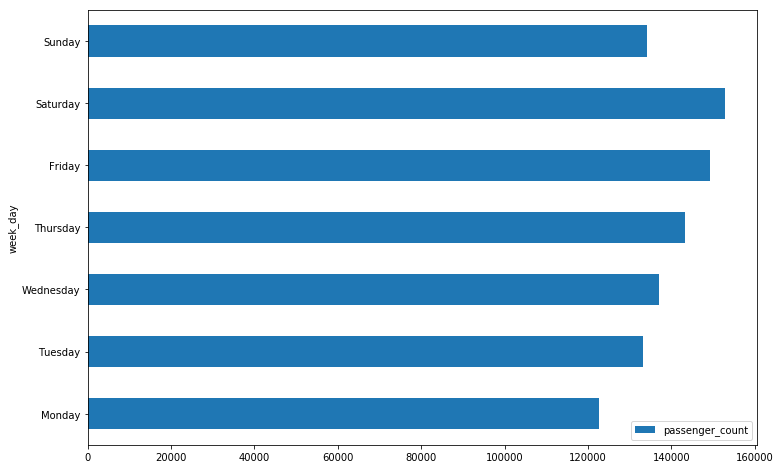

In [28]:
#plt.figure(figsize=(12,800))
grouped2.head(7).plot(kind='barh', figsize=(12,8))
plt.show()

In [29]:
grouped2.head()

,passenger_count
week_day,
Monday,122687
Tuesday,133275
Wednesday,137027
Thursday,143274
Friday,149378


In [30]:
grouped2 = df.groupby('week_day').passenger_count.sum().sort_values(ascending=False)

In [31]:
grouped2

week_day
Saturday     152938
Friday       149378
Thursday     143274
Wednesday    137027
Sunday       134122
Tuesday      133275
Monday       122687
Name: passenger_count, dtype: int64

In [32]:
grouped2 = grouped2.to_frame().reset_index()

In [33]:
grouped2

,week_day,passenger_count
0,Saturday,152938
1,Friday,149378
2,Thursday,143274
3,Wednesday,137027
4,Sunday,134122
5,Tuesday,133275
6,Monday,122687


In [34]:
grouped2.week_day

0     Saturday
1       Friday
2     Thursday
3    Wednesday
4       Sunday
5      Tuesday
6       Monday
Name: week_day, dtype: object

In [35]:
grouped2.week_day.map(daydict)

0    5
1    4
2    3
3    2
4    6
5    1
6    0
Name: week_day, dtype: int64

In [36]:
# %matplotlib inline

In [37]:
import folium

In [38]:
lat = df.pickup_latitude.mean()
long = df.pickup_longitude.mean()

In [39]:
cab_map = folium.Map([lat, long])
cab_map

In [108]:
for row in df.sample(500).index:
   lat = df['pickup_latitude'][row]
   long = df['pickup_longitude'][row]
   dur = df['trip_duration'][row]
   passengers = df['passenger_count'][row]
   details = 'Duration: {} Passengers:{}'.format(dur, passengers)
   marker = folium.Marker([lat, long])
   marker.add_to(cab_map)
cab_map

In [41]:
# how do trips vary compared to month of the year and day of the week?

In [42]:
## gets month
df['pickup_month'] = df.pickup_datetime.apply(lambda x: x.month)
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,week_day,pickup_month
583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday,6
1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday,3
358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,Wednesday,2
1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,Thursday,3
110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,Wednesday,4
851493,id0947345,1,2016-05-20 13:28:43,2016-05-20 13:47:06,1,-73.988792,40.773994,-73.957748,40.778717,N,1103,Friday,5
585211,id1719734,2,2016-03-30 20:27:43,2016-03-30 20:33:47,2,-73.974960,40.756119,-73.984230,40.742901,N,364,Wednesday,3
252133,id1766631,1,2016-01-11 00:12:45,2016-01-11 00:16:40,1,-73.935867,40.795464,-73.944801,40.787407,N,235,Monday,1
605202,id3271163,1,2016-03-19 01:10:52,2016-03-19 01:17:08,1,-74.001427,40.735867,-74.009666,40.719486,N,376,Saturday,3
482175,id1365294,2,2016-04-08 08:58:58,2016-04-08 09:28:22,1,-73.969261,40.763302,-73.870529,40.773663,N,1764,Friday,4


In [43]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month
count,583458.000000,583458.000000,583458.000000,583458.000000,583458.000000,583458.000000,5.834580e+05,583458.000000
mean,1.535302,1.667131,-73.973520,40.750927,-73.973516,40.751822,9.622880e+02,3.516186
std,0.498753,1.317806,0.098931,0.032237,0.098952,0.035565,6.151275e+03,1.682228
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000e+00,1.000000
25%,1.000000,1.000000,-73.991837,40.737320,-73.991318,40.735905,3.960000e+02,2.000000
50%,2.000000,1.000000,-73.981712,40.754143,-73.979752,40.754528,6.610000e+02,4.000000
75%,2.000000,2.000000,-73.967285,40.768394,-73.963013,40.769836,1.074000e+03,5.000000
max,2.000000,9.000000,-65.848389,43.017578,-65.848389,43.674000,3.526282e+06,6.000000


In [44]:
## filters out outliers by looking only at trips less than an hour.  
df = df[df.trip_duration < 3600]
df['pickup_month'] = df.pickup_datetime.apply(lambda x: x.month)
### creates one hot encoding of month columns

### this is in a sparse matrix - so rather than each row looking like 0|0|0|1|0|0
### instead this is represented as ind_4
from sklearn.preprocessing import OneHotEncoder

#dummy variables
oe = OneHotEncoder()

months = oe.fit_transform(df.pickup_month.values.reshape(-1,1))
months

/Users/samuelstollman-smouha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<578495x6 sparse matrix of type '<class 'numpy.float64'>'
	with 578495 stored elements in Compressed Sparse Row format>

In [45]:
from scipy.sparse import hstack

### adds to months new columns giving absolute difference in latitude and absolute difference in longitude
months = hstack([months,abs(df.pickup_latitude - df.dropoff_latitude).values.reshape(-1,1),
                abs(df.pickup_longitude - df.dropoff_longitude).values.reshape(-1,1)])

In [46]:
## train lasso model

from sklearn.linear_model import Lasso

lr = Lasso(normalize=True, alpha = 1e-5)

lr.fit(months, df.trip_duration)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
### look at coefficients

### first 6 are months, 7th is lat difference, 8th is lon difference

lr.coef_

array([ -50.79818905,  -40.3126755 ,  -26.21781427,    0.        ,
         18.62145909,   26.74081255, 8443.41759018, 5949.23063721])

In [48]:
lr.intercept_

506.23226806785317

In [49]:
df[df.trip_duration < 3600].groupby('pickup_month').trip_duration.mean()

pickup_month
1    768.728224
2    776.042521
3    796.465717
4    821.808505
5    847.745406
6    852.978295
Name: trip_duration, dtype: float64

In [50]:
set(lr.predict(months))

{972.6333658328745,
 1140.9617781975994,
 672.3103054294186,
 611.1980299909269,
 591.614727146575,
 754.4558136336843,
 693.8634733476861,
 683.6476883742031,
 714.2703023421193,
 643.7483666955706,
 603.3427100615996,
 2160.6441827845897,
 715.7922208168159,
 593.9187610606903,
 777.0662259133403,
 695.0649260685964,
 644.8927276858341,
 858.8853783212885,
 614.5367320176815,
 584.9201943116321,
 584.6945936801902,
 708.787451557693,
 600.4560816202815,
 554.9514041739033,
 717.5832626613403,
 565.1668496258254,
 677.907825272792,
 616.6255131276926,
 555.3085130700358,
 718.5983748942228,
 1186.9608723630677,
 596.5701967204229,
 718.7902330242644,
 769.0945102367137,
 698.3161695816739,
 586.475157152029,
 556.3335336428584,
 614.1192470295605,
 587.1920691459499,
 664.104911232576,
 740.8590651037148,
 679.74685026778,
 608.7376537897113,
 608.2269242211665,
 566.4296975995189,
 598.229424186168,
 700.5791829142904,
 639.7825556837054,
 568.591082711767,
 619.7787032343117,
 548.9

In [51]:
df[df.trip_duration < 3600].groupby('pickup_month').trip_duration.std()

pickup_month
1    551.052193
2    552.730455
3    568.656467
4    589.386478
5    616.780678
6    618.699919
Name: trip_duration, dtype: float64

In [52]:
df.groupby('pickup_month').size()

pickup_month
1     91395
2     94942
3    101843
4     99371
5     98062
6     92882
dtype: int64

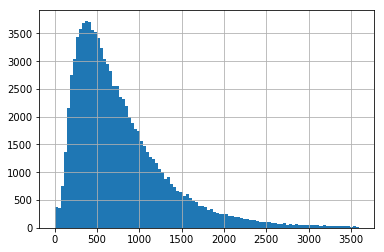

In [53]:
# February
df[(df.pickup_month == 2) ].trip_duration.hist(bins = 100)

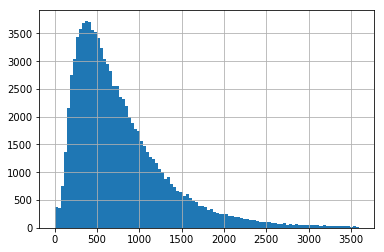

In [54]:
#February

df[(df.pickup_month == 2) & (df.trip_duration < 7200)].trip_duration.hist(bins = 100)

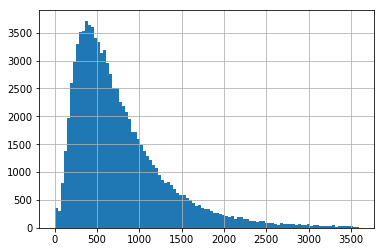

In [55]:
January

df[(df.pickup_month == 1) & (df.trip_duration < 7200)].trip_duration.hist(bins = 100)

In [56]:
df[(df.pickup_month == 2) & (df.trip_duration < 3600)].trip_duration.mean()

776.0425206968465

In [57]:
df.groupby('pickup_month').trip_duration.max()

pickup_month
1    3596
2    3596
3    3595
4    3598
5    3599
6    3599
Name: trip_duration, dtype: int64

In [58]:
 86391/3600.

23.9975

/Users/samuelstollman-smouha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


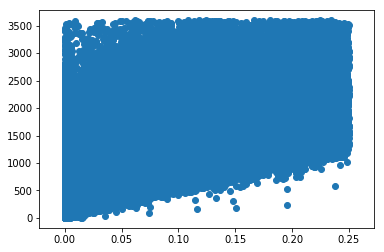

In [59]:
#plot below looks weird

plt.figure()


df['dist'] = abs(df.pickup_latitude - df.dropoff_latitude) + abs(df.pickup_longitude - df.dropoff_longitude)
                                                                 

                                                                 
plt.scatter(df[df.dist < 0.25].dist.values, df[df.dist < 0.25].trip_duration.values)

plt.show()

In [60]:
print(df)

                id  vendor_id     pickup_datetime    dropoff_datetime  \
583100   id3879397          1 2016-06-02 17:46:16 2016-06-02 18:22:26   
1320440  id0701659          1 2016-03-02 10:07:11 2016-03-02 10:20:39   
1118733  id0727316          2 2016-03-17 07:30:59 2016-03-17 07:42:18   
110409   id2137873          2 2016-04-20 17:15:26 2016-04-20 18:01:57   
851493   id0947345          1 2016-05-20 13:28:43 2016-05-20 13:47:06   
585211   id1719734          2 2016-03-30 20:27:43 2016-03-30 20:33:47   
252133   id1766631          1 2016-01-11 00:12:45 2016-01-11 00:16:40   
605202   id3271163          1 2016-03-19 01:10:52 2016-03-19 01:17:08   
482175   id1365294          2 2016-04-08 08:58:58 2016-04-08 09:28:22   
1001562  id3780207          1 2016-06-25 17:17:37 2016-06-25 17:21:01   
1173354  id2807877          2 2016-05-20 07:22:04 2016-05-20 07:25:38   
521167   id3987564          2 2016-02-23 23:34:52 2016-02-23 23:55:41   
536110   id3064301          2 2016-04-07 23:35:43 2

In [61]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,week_day,pickup_month,dist
583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday,6,0.066898
1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday,3,0.018269
1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,Thursday,3,0.059246
110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,Wednesday,4,0.324551
851493,id0947345,1,2016-05-20 13:28:43,2016-05-20 13:47:06,1,-73.988792,40.773994,-73.957748,40.778717,N,1103,Friday,5,0.035767
585211,id1719734,2,2016-03-30 20:27:43,2016-03-30 20:33:47,2,-73.974960,40.756119,-73.984230,40.742901,N,364,Wednesday,3,0.022488
252133,id1766631,1,2016-01-11 00:12:45,2016-01-11 00:16:40,1,-73.935867,40.795464,-73.944801,40.787407,N,235,Monday,1,0.016991
605202,id3271163,1,2016-03-19 01:10:52,2016-03-19 01:17:08,1,-74.001427,40.735867,-74.009666,40.719486,N,376,Saturday,3,0.024620
482175,id1365294,2,2016-04-08 08:58:58,2016-04-08 09:28:22,1,-73.969261,40.763302,-73.870529,40.773663,N,1764,Friday,4,0.109093
1001562,id3780207,1,2016-06-25 17:17:37,2016-06-25 17:21:01,1,-73.962425,40.778786,-73.964180,40.774620,N,204,Saturday,6,0.005920


In [62]:
df[df.trip_duration < 3600].shape

(578495, 14)

In [63]:
df.shape

(578495, 14)

In [64]:
from sklearn.linear_model import LinearRegression

#Initialize a regression object
linreg = LinearRegression()

In [93]:
#Define X and Y
X = df[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'
        ]] #features we think may help predict y
y = df['trip_duration'] #what we want to predict

In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578495 entries, 0 to 578494
Data columns (total 5 columns):
passenger_count      578495 non-null int64
pickup_longitude     578495 non-null float64
pickup_latitude      578495 non-null float64
dropoff_longitude    578495 non-null float64
dropoff_latitude     578495 non-null float64
dtypes: float64(4), int64(1)
memory usage: 22.1 MB


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [69]:
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

433871 144624 433871 144624


In [70]:
from sklearn.linear_model import LinearRegression


In [71]:

#Initialize a regression object
linreg = LinearRegression()



In [72]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [74]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 323931.2905284469
Test Mean Squared Error: 317869.0655346271


In [77]:
import math

In [78]:
print('Train Mean Square Root of Squared Error:', math.sqrt(train_mse))
print('Test Mean Square Root of Squared Error:', math.sqrt(test_mse))


Train Mean Square Root of Squared Error: 569.1496205115549
Test Mean Square Root of Squared Error: 563.7987810687667


In [79]:
from sklearn.model_selection import KFold

In [80]:
df.shape

(578495, 14)

In [81]:
df.index

Int64Index([ 583100, 1320440, 1118733,  110409,  851493,  585211,  252133,
             605202,  482175, 1001562,
            ...
             723437,  657877,  439081,  110896,   84896, 1205321,  755085,
            1401695,  295633,  183456],
           dtype='int64', length=578495)

In [82]:
kf = KFold(n_splits=6, shuffle=True)

In [83]:
for train_index, test_index in kf.split(df):
    print('train index:', train_index, len(train_index))
    print('test index:', test_index, len(test_index))
    print()

train index: [     0      2      3 ... 578491 578492 578493] 482079
test index: [     1     22     23 ... 578487 578488 578494] 96416

train index: [     0      1      2 ... 578491 578493 578494] 482079
test index: [     3      4     10 ... 578480 578482 578492] 96416

train index: [     1      2      3 ... 578492 578493 578494] 482079
test index: [     0     19     24 ... 578481 578486 578489] 96416

train index: [     0      1      2 ... 578490 578492 578494] 482079
test index: [     6      9     13 ... 578484 578491 578493] 96416

train index: [     0      1      3 ... 578492 578493 578494] 482079
test index: [     2      7     18 ... 578476 578478 578483] 96416

train index: [     0      1      2 ... 578492 578493 578494] 482080
test index: [     5      8     11 ... 578473 578485 578490] 96415



In [84]:
# folds = kfolds(df, k=10)

In [85]:
import numpy as np

In [86]:
rmse_df = pd.DataFrame(columns=['fold', 'train', 'test'])

df=df.dropna().reset_index(drop=True)
#Define X and Y
X = df[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'
        ]] #features we think may help predict y
y = df['trip_duration'] #what we want to predict


for fold, (train_index, test_index) in enumerate(kf.split(df)):
    X_tr = X.loc[train_index,:]
    y_tr = y.loc[train_index]
    X_te = X.loc[test_index,:]
    y_te = y.loc[test_index]
    
    print(X_tr.shape, y_tr.shape)
    print(X_te.shape, y_te.shape)
    print()
    
#     Similar: X_tr, y_tr, X_te, y_te = train_test_split(......)    
#     print(X_tr.shape, y_tr.shape)
#     print(X_te.shape, y_te.shape)
#     print()

    mod = LinearRegression()
    mod.fit(X_tr, y_tr)
    
    rmse_tr = np.sqrt(mean_squared_error(y_tr, mod.predict(X_tr)))
    rmse_te = np.sqrt(mean_squared_error(y_te, mod.predict(X_te)))
    
    tmp_df = pd.DataFrame({'fold': [fold], 'train': [rmse_tr], 'test': [rmse_te]})
    rmse_df = pd.concat([rmse_df, tmp_df], ignore_index=True)

(482079, 5) (482079,)
(96416, 5) (96416,)

(482079, 5) (482079,)
(96416, 5) (96416,)

(482079, 5) (482079,)
(96416, 5) (96416,)

(482079, 5) (482079,)
(96416, 5) (96416,)

(482079, 5) (482079,)
(96416, 5) (96416,)

(482080, 5) (482080,)
(96415, 5) (96415,)



In [87]:
rmse_df

,fold,train,test
0,0,567.025390,574.427066
1,1,568.765039,562.645755
2,2,568.041175,566.111335
3,3,567.018185,571.599649
4,4,566.009341,579.207943
5,5,567.802845,567.729797


In [88]:
print('Mean training rmse:', rmse_df['train'].mean())
print('Mean testing rmse:', rmse_df['test'].mean())

Mean training rmse: 567.4436624447329
Mean testing rmse: 570.2869243651442


In [89]:
from plotnine import *

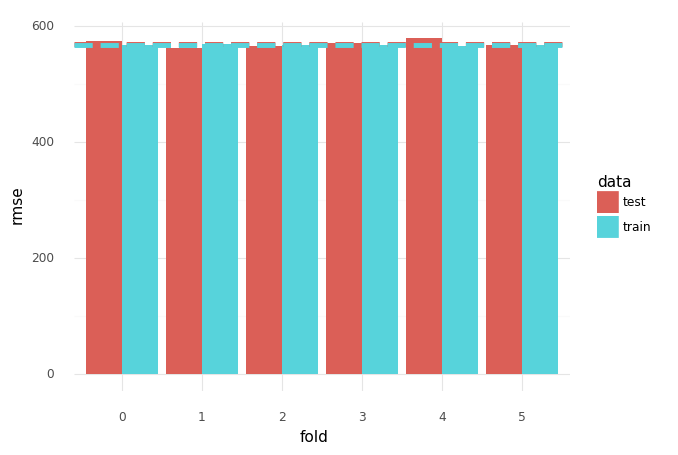

<ggplot: (-9223372029832907804)>

In [90]:
plt_df = (rmse_df.melt(id_vars=['fold'], var_name='data', value_name='rmse')
          .assign(mean = lambda d: d.groupby('data')['rmse'].transform(lambda x: x.mean()))
         )
(ggplot(plt_df, aes(x='fold', y='rmse', fill='data'))
 + geom_col(position='dodge')
 + geom_hline(aes(yintercept='mean', color='data'), linetype='--', size=2)
 + theme_minimal()
)

In [391]:
plt_df

,fold,data,rmse,mean
0,0,train,568.055734,567.431257
1,1,train,569.085741,567.431257
2,2,train,565.455227,567.431257
3,3,train,566.918446,567.431257
4,4,train,566.855181,567.431257
5,5,train,568.217213,567.431257
6,0,test,565.965743,570.446160
7,1,test,560.950991,570.446160
8,2,test,582.639229,570.446160
9,3,test,572.492455,570.446160


In [111]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,week_day,pickup_month,dist
0,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday,6,0.066898
1,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday,3,0.018269
2,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,Thursday,3,0.059246
3,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,Wednesday,4,0.324551
4,id0947345,1,2016-05-20 13:28:43,2016-05-20 13:47:06,1,-73.988792,40.773994,-73.957748,40.778717,N,1103,Friday,5,0.035767


In [112]:
# Lasso

from sklearn.linear_model import Lasso

lr = Lasso(normalize=True, alpha = 1e-5)

lr.fit(df[['passenger_count']], df['trip_duration'])

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
df.passenger_count

0         1
1         1
2         1
3         6
4         1
5         2
6         1
7         1
8         1
9         1
10        1
11        6
12        1
13        2
14        1
15        1
16        1
17        1
18        1
19        1
20        2
21        1
22        1
23        5
24        1
25        1
26        2
27        4
28        1
29        1
         ..
578465    1
578466    1
578467    5
578468    2
578469    1
578470    1
578471    5
578472    3
578473    1
578474    2
578475    1
578476    1
578477    3
578478    1
578479    2
578480    1
578481    1
578482    1
578483    1
578484    1
578485    1
578486    1
578487    1
578488    2
578489    1
578490    5
578491    1
578492    1
578493    1
578494    2
Name: passenger_count, Length: 578495, dtype: int64

In [106]:
Y = df.drop('passenger_count', axis=1)

In [107]:
lr = Lasso(normalize=True, alpha = 1e-5)

lr.fit('passenger_count', 'trip_duration')

ValueError: could not convert string to float: 'passenger_count'

In [110]:
df.passenger_count.min

<bound method Series.min of 0         1
1         1
2         1
3         6
4         1
5         2
6         1
7         1
8         1
9         1
10        1
11        6
12        1
13        2
14        1
15        1
16        1
17        1
18        1
19        1
20        2
21        1
22        1
23        5
24        1
25        1
26        2
27        4
28        1
29        1
         ..
578465    1
578466    1
578467    5
578468    2
578469    1
578470    1
578471    5
578472    3
578473    1
578474    2
578475    1
578476    1
578477    3
578478    1
578479    2
578480    1
578481    1
578482    1
578483    1
578484    1
578485    1
578486    1
578487    1
578488    2
578489    1
578490    5
578491    1
578492    1
578493    1
578494    2
Name: passenger_count, Length: 578495, dtype: int64>